Links salvos na lista com sucesso
Raspagem de dados finalizada
Nuvem plotada com sucesso


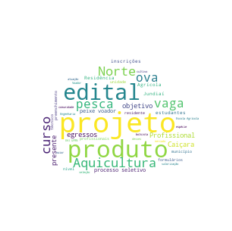

In [7]:
import time
import requests
from bs4 import BeautifulSoup as soup
from selenium import webdriver

options = webdriver.FirefoxOptions()
options.add_argument('headless')

driver = webdriver.Firefox(executable_path = '/home/gustavo/Downloads/geckodriver-v0.29.0-linux32/geckodriver', options = options)
urlLinks = 'https://ufrn.br/imprensa/noticias/filtros?text=eaj'
driver.get(urlLinks)
urlList = []

try:
    body = driver.find_element_by_tag_name('body')
    html = body.get_attribute('innerHTML')
    soupPage = soup(html, 'html5lib')
    #OBTÉM A QUANTIDADE DE PÁGINAS A PARTIR DO RESULTADO PESQUISADO
    lastPage = int(driver.find_element_by_xpath("/html/body/div[3]/div/div[1]/section/section/nav/ul/li[8]/a").text)
    for pages in range (lastPage): 
        body = driver.find_element_by_tag_name('body')
        html = body.get_attribute('innerHTML')
        soupPage = soup(html, 'html5lib')
        #CRIA UMA LISTA COM OS LINKS PARA CADA NOTÍCIA
        linkList = soupPage.findAll("a", class_='blue-link')
        
        #MONTA DINAMICAMENTE A URL E SALVA NA LISTA DE URLS.
        for n in range(2,len(linkList)):
            link = 'https://ufrn.br/' + linkList[n].get('href') + "\n"
            urlList.append(link)       
        #DÁ UM CLICK NO ELEMENTO '>' PARA A AVANÇAR PARA A PRÓXIMA PÁGINA
        driver.find_element_by_xpath("//a[contains(text(),'>')]").click()
        #DELAY PARA CARREGAR A PRÓXIMA PÁGINA '(evita bugs)'
        time.sleep(2)  
except Exception as e:
    print(e)
    
print('Links salvos na lista com sucesso')

#RASPAGEM DE DADOS COM OS LINKS SALVOS A PARTIR DA RASPAGEM ANTERIOR

def getList(urlList):
    text = ""
    try:
        #JUNTA TODO O ARTIGO EM UMA ÚNICA STRING CONTENDO TODOS OS ARQUIVOS OBTIDOS NA RASPAGEM
        for i in range(len(urlList)):
            driver.get(urlList[i])
            spanList = driver.find_elements_by_css_selector("span[style='font-weight: 400;']")
            for j in range(len(spanList)):
                text += " " + spanList[j].text 
            text += "\n\n"
        return text
    except Exception as e:
        print(e) 
    
generalText = getList(urlList)
driver.close()

print('Raspagem de dados finalizada')

#GERAÇÃO DA WORDCLOUD

from wordcloud import WordCloud, STOPWORDS

STOPWORDS = ['ver','principal','essa','vez','nas','mas',
             'qual','principal','ele','ter','doença','pois','este',
             'vez','ver principal','artigo principal','já',
             'aos','pode','outro','artigo','desse',
             'alguns','meio','entre','das','podem','esse',
             'seu','também','são','quando','de', 'que','em',
             'os','as','da','como','dos','ou','se','um','uma',
             'para','na','ao','mais','por','não','ainda','muito','sua',
             'a', 'é', 'o', 'e', 'no', 'do', 'toda', 'todo', 'estão',
             'está', 'pela', 'pelo', 'fazer', 'foram', 'sendo', 'está',
             'à', 'serão', 'foi', 'ser', 'tem', 'nos', 'sobre', 'cada',
             'todos', 'abriu', 'vão', 'até', 'abriu', 'ofertando', 'com',
             'anexo', '1º', 'minha', 'selecionar', 'escolher',
             'possível', 'nesse', 'todas', 'falou', 'outros',
             'recém', 'através', 'às', 'dia']

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image

def create_wordCloud(text):
    maskArray = np.array(Image.open("cloud.jpeg"))
    circle = WordCloud(background_color = "white",max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
    circle.generate(text)
    circle.to_file("wordCloud_EAJ.jpg")
    time.sleep(2)
    plt.figure()
    plt.imshow(circle, interpolation='bilinear')
    plt.axis('off')
    
create_wordCloud(generalText)

print('Nuvem plotada com sucesso')